<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Pythonic_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://lectures.scientific-python.org/packages/scikit-image/index.html

Image ndarrays can be represented either by integers (signed or unsigned) or floats.

Careful with **overflows** with integer data types

uint8
(512, 512)


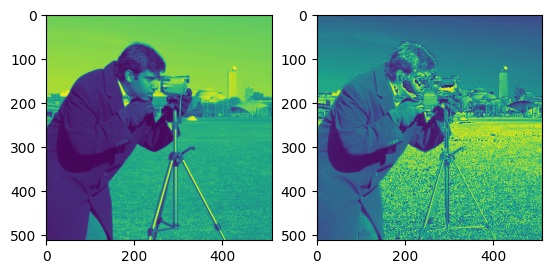

In [3]:
from skimage import data
import numpy as np
from matplotlib import pyplot as plt

camera = data.camera()
print(camera.dtype)
print(camera.shape)
camera_multiply = 3 * camera

fig,ax = plt.subplots(1,2)
ax[0].imshow(camera)
ax[1].imshow(camera_multiply)

Some image processing routines need to work with float arrays

In [4]:
from skimage.util import img_as_float
camera_float = img_as_float(camera)
print(camera.max(), camera_float.max())

255 1.0


local vs non-local filters

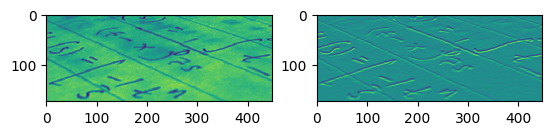

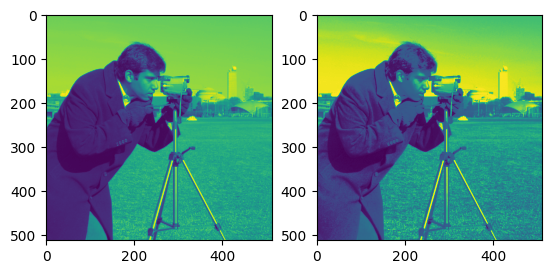

In [6]:
from skimage import filters
text = data.text()
hsobel_text = filters.sobel_h(text)
fig,ax = plt.subplots(1,2)
ax[0].imshow(text)
ax[1].imshow(hsobel_text)

from skimage import exposure
camera_equalized = exposure.equalize_hist(camera)
fig,ax = plt.subplots(1,2)
ax[0].imshow(camera)
ax[1].imshow(camera_equalized)

"""
Non-local filters use a large region of the image (or all the image) to transform the value of one pixel:
Enhances contrast in large almost uniform regions.
"""

Text(0.5, 1.0, 'tv_denoise')

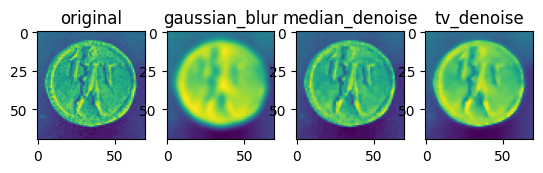

In [5]:
#Example of filters comparison: image denoising
from skimage import data,filters,restoration
from skimage.morphology import disk
from matplotlib import pyplot as plt

coins = data.coins()
coins_zoom = coins[10:80, 300:370]

gaussian_coins = filters.gaussian(coins_zoom, sigma=2)

median_coins = filters.median(
    coins_zoom, disk(1)
)

tv_coins = restoration.denoise_tv_chambolle(
    coins_zoom, weight=0.1
)

fig,ax = plt.subplots(1,4)
ax[0].imshow(coins_zoom)
ax[0].set_title('original')
ax[1].imshow(gaussian_coins)
ax[1].set_title('gaussian_blur')
ax[2].imshow(median_coins)
ax[2].set_title('median_denoise')
ax[3].imshow(tv_coins)
ax[3].set_title('tv_denoise')

segmentation.clear_border(mask).astype(int)

coins_edges = segmentation.mark_boundaries(coins, clean_border)

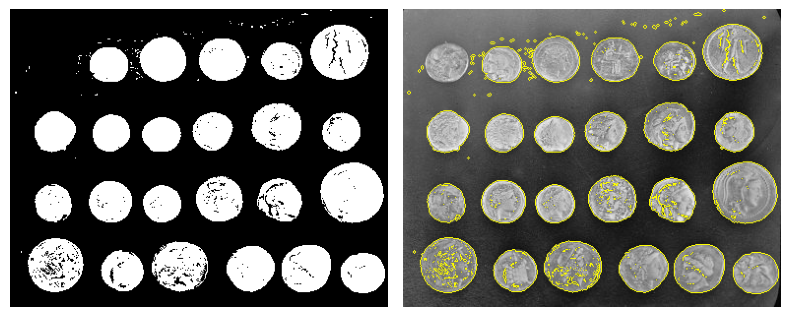

In [8]:
from skimage import data, segmentation
from skimage import filters
import matplotlib.pyplot as plt
import numpy as np

coins = data.coins()
mask = coins > filters.threshold_otsu(coins)
clean_border = segmentation.clear_border(mask).astype(int)

coins_edges = segmentation.mark_boundaries(coins, clean_border)

plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(coins_edges)
plt.axis("off")

plt.tight_layout()
plt.show()

(-0.5, 383.5, 302.5, -0.5)

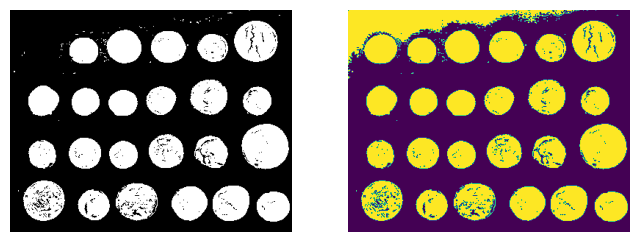

In [7]:
plt.figure(figsize=(8, 3.5))
plt.subplot(121)
plt.imshow(clean_border, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.imshow(mask)
plt.axis("off")